In [35]:
# Author: Umut Mehmet ERDEM - 2024

import matplotlib.pyplot as plt
import numpy as np

"""
@brief Writes image data to a file in PGM format (P2 or P5).
@param1 magicnum: Magic number representing the PGM format (P2 for ASCII, P5 for binary).
@param2 filename: Path of the file to write the image data.
@param3 width: Width of the image.
@param4 height: Height of the image.
@param5 maxval: Maximum pixel value.
@param6 data: 2D list containing the image pixel data.
@retval None
"""
def mypgmwrite(magicnum,filename, width, height, maxval, data):
    with open(filename, 'wb') as f:
        f.write(f'{magicnum}\n#{filename}\n{width} {height}\n{maxval}\n'.encode())
        for row in data:
            for i in row: f.write(bytes([int(i)])) if magicnum == "P5" else f.write(f"{int(i)} ".encode())
            if magicnum == "P2": f.write('\n'.encode())

"""
@brief Reads image data from a PGM file (P2 or P5).
@param1 filename: Path of the file to read the image data from.
@retval magicnum: Magic number representing the PGM format (P2 for ASCII, P5 for binary).
@retval width: Width of the image.
@retval height: Height of the image.
@retval maxval: Maximum pixel value.
@retval data: 2D list containing the image pixel data.
"""
def mypgmread(filename):
    with open(filename, 'rb') as f:

        def read_and_cntrl():
            line = f.readline().strip()
            while line.startswith(b'#'):
                line = f.readline().strip()
            return line
        
        magicnum = read_and_cntrl()
        width, height = map(int, read_and_cntrl().split())
        maxval = int(read_and_cntrl())

        data = []
        if magicnum == b'P5':
            for i in range(height):
                data.append(list(f.read(width)))
        else:
            for i in range(height):
                data.append(list(map(int, read_and_cntrl().split())))

        print(f"{magicnum}\n{width} {height}\n{maxval}")
        for i in data: print(*i, sep=" ")

        return magicnum, width, height, maxval, data
    
"""
@brief Modifies the pixel values of a 2D list.
@param1 data: 2D list containing the image pixel data.
@param2 start_row: Starting row index.
@param3 end_row: Ending row index.
@param4 start_col: Starting column index.
@param5 end_col: Ending column index.
@param6 new_value: New pixel value.
@retval data: 2D list containing the modified image pixel data.
"""
def modify_pixels(data, start_row, end_row, start_col, end_col, new_value):
    for i in range(start_row, end_row + 1):
        for j in range(start_col, end_col + 1):
            data[i][j] = new_value
    return data

In [36]:
magicnum, width, height, maxval, data = mypgmread("Fig0304.pgm")

b'P5'
482 571
255
23 30 32 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 27 27 27 27 28 28 29 26 28 29 29 2

In [37]:
"""
@brief Creates the negative of an image by modifying the pixel values of a 2D list.
@param1 maxval: Maximum pixel value.
@param2 data: 2D list containing the image pixel data.
@retval f_negative: 2D list containing the negative image pixel data.
"""
def myImageNegative(maxval, data):
    f_negative = []
    for i in range(len(data)):
        f_negative.append([0] * len(data[i]))
        for j in range(len(data[i])):
            f_negative[i][j] = maxval - data[i][j]
    return f_negative

f_negative = myImageNegative(maxval, data)

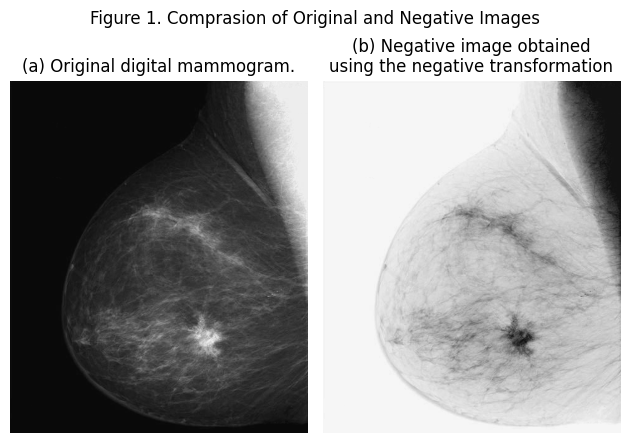

In [38]:
fig, ax = plt.subplots(1, 2)
ax[0].axis("off"), ax[1].axis("off")
ax[0].imshow(data, cmap="gray"), ax[1].imshow(f_negative, cmap="gray")
ax[0].set_title('(a) Original digital mammogram.'), ax[1].set_title("(b) Negative image obtained\nusing the negative transformation")
fig.suptitle("Figure 1. Comprasion of Original and Negative Images")
fig.tight_layout()
plt.show()

Yukarıdaki Figure 1 incelendiğinde, negatif filtreleme işlemi her bir piksel değerini maksimum piksel değerinden çıkararak yeni bir piksel değeri oluşturmuştur. Bu işlem, görüntünün parlaklık ve kontrastını tersine çevirmiş, böylece daha önce koyu olan bölgeler açık, açık olan bölgeler ise koyu hale gelmiştir. Negatif görüntü incelendiğinde, belirli detayların daha belirgin hale geldiği fark edilmiştir.

In [39]:
magicnum, width, height, maxval, data = mypgmread("Fig0305.pgm")

b'P5'
256 256
255
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 0 3 3 0 0 3 3 0 0 3 6 6 6 9 11 11 9 3 13 17 13 3 9 11 11 9 6 6 6 3 0 0 3 3 0 0 3 3 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 0 0 0 0 3 0 3 6 6 6 9 11 6 6 15 17 15 6 6 11 9 6 6 6 3 0 3 0 0 0 0 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [40]:
"""
@brief Normalizes the pixel values of a 2D list to the range [0, 255].
@param1 data: 2D list containing the image pixel data.
@retval normalized_data: 2D list containing the normalized image pixel data.
"""
def normalize(data):
    min_val = np.min(np.min(data))
    max_val = np.max(np.max(data))
    normalized_data = [[np.uint8((i-min_val)/(max_val-min_val)*255) for i in row] for row in data]
    return normalized_data

In [41]:
"""
@brief Applies logarithmic transformation to the given image data.
@param1 c: Constant value for the transformation.
@param2 data: 2D list containing the image pixel data.
@retval f_logTransformation: 2D list containing the transformed image pixel data.
"""
def myLogTransformation(c, data):
    f_logTransformation = []
    for i in range(len(data)):
        f_logTransformation.append([0] * len(data[i]))
        for j in range(len(data[i])):
            f_logTransformation[i][j] = c*np.log(1+data[i][j])
    
    f_logTransformation = normalize(f_logTransformation)
    return f_logTransformation

f_logTransformation = myLogTransformation(1e-2, data)


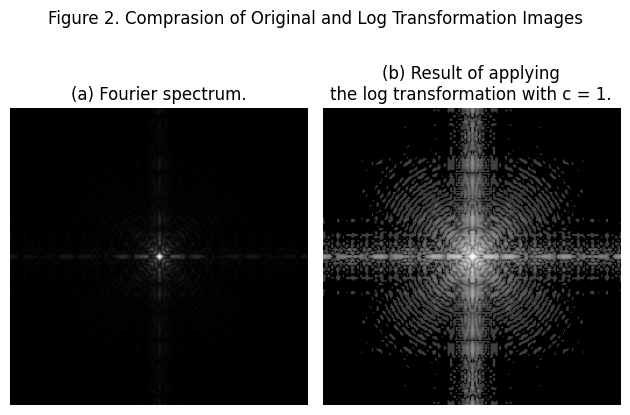

In [42]:
fig, ax = plt.subplots(1, 2)
ax[0].axis("off"), ax[1].axis("off")
ax[0].imshow(data, cmap="gray"), ax[1].imshow(f_logTransformation, cmap="gray")
ax[0].set_title('(a) Fourier spectrum.'), ax[1].set_title("(b) Result of applying\nthe log transformation with c = 1.")
fig.suptitle("Figure 2. Comprasion of Original and Log Transformation Images")
fig.tight_layout()
plt.show()

Yukarıdaki Figure 2 incelendiğinde, logaritmik dönüşüm sonucunda görüntüde belirgin değişiklikler gözlemlenmiştir. Logaritmik dönüşüm, görüntünün düşük yoğunluklu bölgelerindeki detayları daha belirgin hale getirirken, yüksek yoğunluklu bölgelerdeki detayları sıkıştırmıştır. Bu sayede, görüntünün kontrastı artırılarak daha fazla detay ortaya çıkarılmıştır. Bu da, orijinal görüntüye kıyasla daha fazla detay ve kontrast sunmuş ve gözle görülmesi zor olan detayların daha belirgin hale gelmesine yardımcı olarak görüntünün genel algısını iyileştirmiştir.

Logaritmik dönüşüm formülündeki logaritma tabanının veya c katsayısının değişimi, keskin beyaz veya siyah renkler arasındaki ölçeklendirmeyi yakınlaştırması haricinde bir fark oluşturmadığı ve bu değişiklikler sonucunda hep aynı resmin çıktığı gözlemlenmiştir.

In [43]:
magicnum, width, height, maxval, data = mypgmread("Fig0308.pgm")

b'P5'
746 976
255
0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 3 3 3 3 3 3 4 4 4 4 4 4 3 3 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 5 5 7 7 8 8 9 9 10 10 13 13 16 16 17 17 14 14 12 12 10 10 8 8 6 6 5 5 6 6 7 7 10 10 13 13 15 15 14 14 9 9 6 6 9 9 20 20 40 40 54 54 50 50 41 41 39 39 41 41 42 42 37 37 27 27 19 19 16 16 17 17 17 17 15 15 14 14 13 13 12 12 11 11 11 11 14 14 19 19 24 24 29 29 35 35 40 40 42 42 43 43 40 40 35 35 34 34 47 47 77 77 104 104 109 109 109 109 123 123 134 134 114 114 74 74 48 48 40 40 42 42 47 47 52 52 56 56 56 56 53 53 50 50 52 52 54 54 55 55 60 60 74 74 102 102 129 129 136 136 131 131 118 118 104 104 81 81 56 56 40 40 35 35 39 39 40

In [44]:
"""
@brief Applies gamma transformation to the given image data.
@param1 c: Constant value for the transformation.
@param2 gamma_val: Gamma value for the transformation.
@param3 data: 2D list containing the image pixel data.
@retval f_gammaTransformation: 2D list containing the transformed image pixel data.
"""
def myGammaTransformation(c, gamma_val, data):
    f_gammaTransformation = []
    for i in range(len(data)):
        f_gammaTransformation.append([0] * len(data[i]))
        for j in range(len(data[i])):
            f_gammaTransformation[i][j] = c*(data[i][j]**gamma_val)
    
    f_gammaTransformation = normalize(f_gammaTransformation)
    return f_gammaTransformation

f_gammaTransformation_06 = myGammaTransformation(1, 0.6, data)
f_gammaTransformation_04 = myGammaTransformation(1, 0.4, data)
f_gammaTransformation_03 = myGammaTransformation(1, 0.3, data)

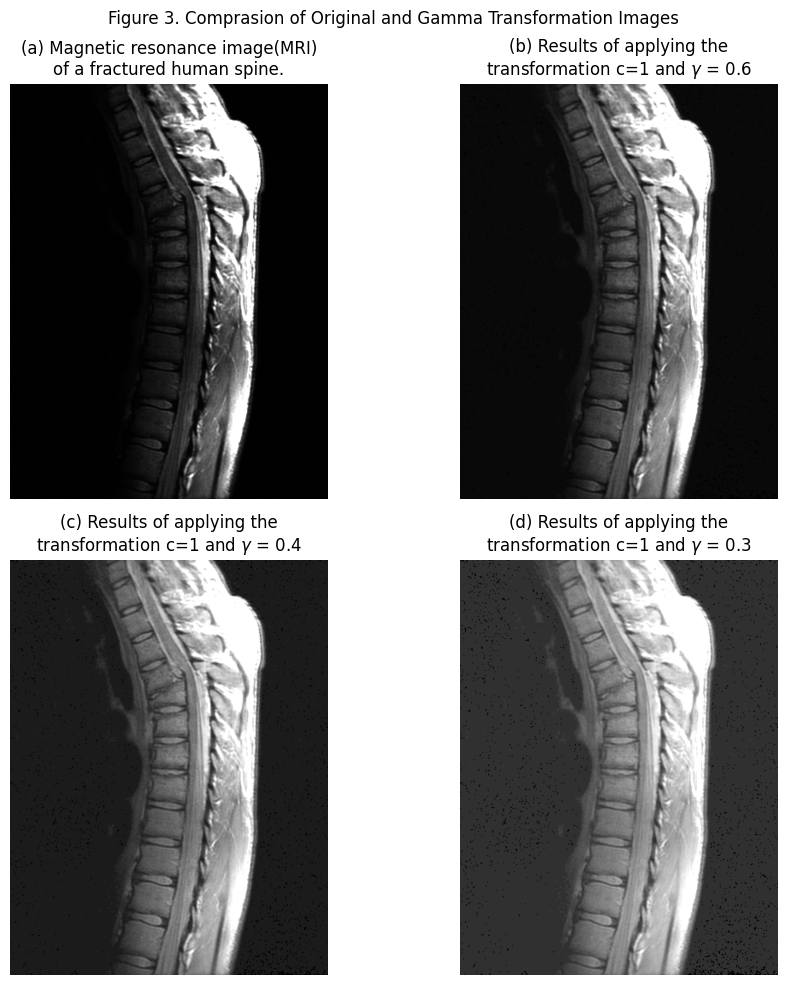

In [45]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].axis("off"), ax[0, 1].axis("off"), ax[1,0].axis("off"), ax[1, 1].axis("off")
ax[0, 0].imshow(data, cmap="gray"), ax[0, 1].imshow(f_gammaTransformation_06, cmap="gray"), ax[1, 0].imshow(f_gammaTransformation_04, cmap="gray"), ax[1, 1].imshow(f_gammaTransformation_03, cmap="gray")
ax[0, 0].set_title('(a) Magnetic resonance image(MRI)\nof a fractured human spine.'), ax[0, 1].set_title("(b) Results of applying the\ntransformation c=1 and $\\gamma$ = 0.6")
ax[1, 0].set_title('(c) Results of applying the\ntransformation c=1 and $\\gamma$ = 0.4'), ax[1, 1].set_title("(d) Results of applying the\ntransformation c=1 and $\\gamma$ = 0.3")
fig.suptitle("Figure 3. Comprasion of Original and Gamma Transformation Images")
fig.tight_layout()
plt.show()

Yukarıdaki Figure 3 incelendiğinde, gamma değeri azaldıkça görüntünün pixel değerleri arasındaki farkın azaldığı ve buna bağlı olarak ölçeklendirmenin daraldığı görülmüştür. Bu, düşük yoğunluklu(karanlık) bölgelerin daha parlak hale gelmesine ve yüksek yoğunluklu(parlak) bölgelerin daha az parlak hale gelmesine neden olmuştur. 
Böylece, Figure 3(b-c)'deki görüntüler daha keskin ve daha kontrastlı olmuş fakat Figure 3(d)'de gamma değerinin 0.3'e düşmesi görüntünün bazı bölgelerinde düşük kontrast farklarına neden olarak görüntünün detaylarının kaybolmasına neden olmuştur. Sonuç olarak, Figure 3(b)'deki işlemin görüntüyü daha detaylı ve Figure 3(d)'deki işlemin görüntüde parazit oluşturması ve kontrastı azaltması nedeniyle daha kötü gösterdiğine karar verilmiştir.

In [46]:
"""
@brief Applies correlation operation on the given image data using the provided kernel.
@param1 kernel: 2D list containing the kernel values.
@param2 data: 2D list containing the image pixel data.
@retval f_correlation: 2D list containing the correlated image pixel data.
"""
def myImageCorrelation(kernel, data):
    x_kernel, y_kernel, x_data, y_data = np.size(kernel, 0), np.size(kernel, 1), np.size(data, 0), np.size(data, 1)
    f_correlation, average = np.zeros((x_data,y_data)), np.sum(kernel)
    for i in range(len(data)):
        for j in range(len(data[i])):
            for k in range(len(kernel)):
                for l in range(len(kernel[k])):
                    if (i+k-x_kernel//2) >= 0 and (i+k+x_kernel//2) <= len(data)+1 and (j+l-y_kernel//2) >= 0 and (j+l+y_kernel//2) <= len(data[i])+1:
                        f_correlation[i][j] += kernel[k][l] * data[(i+k-x_kernel//2)][(j+l-y_kernel//2)]
            f_correlation[i][j] /= average
    f_correlation = normalize(f_correlation)
    return f_correlation

In [47]:
kernel = [[1,2,3], [4,5,6], [7,8,9]]
data = [[0,0,0,0,0], [0,0,0,0,0], [0,0,1,0,0], [0,0,0,0,0], [0,0,0,0,0]]
f_correlation = myImageCorrelation(kernel, data)
print(*f_correlation, sep="\n")

[0, 0, 0, 0, 0]
[0, 255, 226, 198, 0]
[0, 170, 141, 113, 0]
[0, 85, 56, 28, 0]
[0, 0, 0, 0, 0]


In [48]:
magicnum, width, height, maxval, data = mypgmread("Fig0333.pgm")

kernel_3x3, kernel_5x5, kernel_9x9, kernel_15x15, kernel_35x35 = np.ones([3, 3]), np.ones([5,5]), np.ones([9,9]), np.ones([15,15]), np.ones([35,35])

b'P5'
500 500
255
229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 229 22

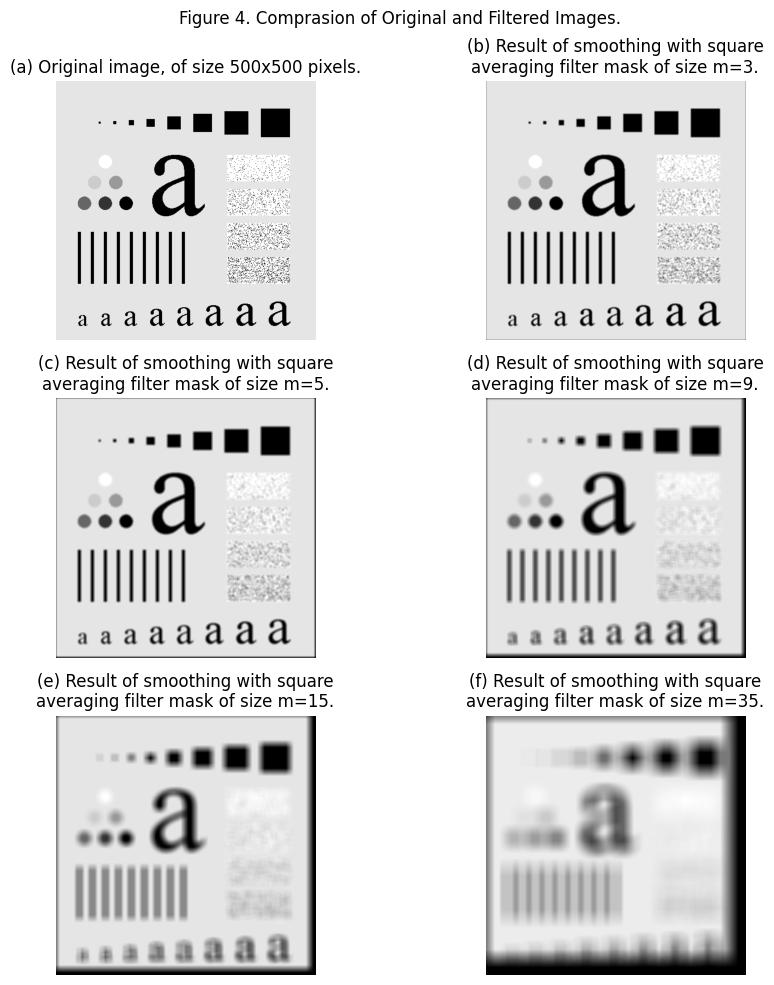

In [49]:
kernels, m = [kernel_3x3, kernel_5x5, kernel_9x9, kernel_15x15, kernel_35x35], [3,5,9,15,35]
fig, ax = plt.subplots(3, 2, figsize=(10,10))
ax[0, 0].axis("off"), ax[0, 0].imshow(data, cmap="gray"), ax[0, 0].set_title('(a) Original image, of size 500x500 pixels.')
for i in range(1, len(kernels)+1):
    f_correlations = myImageCorrelation(kernels[i-1], data)
    ax[i//2, i%2].axis("off"), ax[i//2, i%2].imshow(f_correlations, cmap="gray")
    ax[i//2, i%2].set_title('({:c}) Result of smoothing with square\naveraging filter mask of size m={:d}.'.format(97+i, m[i-1]))
    
fig.suptitle("Figure 4. Comprasion of Original and Filtered Images.")
fig.tight_layout()
plt.show()

Yukarıdaki Figure 4 incelendiğine, (b)'den (f)'ye gidene kadar matrislerin boyutlarının artması resimlerin daha da bulanıklaşması ve çözünürlüklerinin azalmasına neden olmuştur. Figure 4(b-c) için görüntüler anlaşılmasına rağmen Figure 4(d-f)'deki görüntülerde maske boyutu arttıkça bulanıklık daha belirgin hale gelmiş ve detaylar daha da azalmıştır ve en sonunda birçok detay kaybolmuştur. Smoothing with square averaging filter işleminde, Maskeleme her bir pikselin değerini, komşu piksellerin değerlerinin ortalaması ile değiştirmiştir. Bu da, matris boyutu arttıkça, her bir pikselin değerinin daha geniş bir komşuluk alanının ortalaması ile değişmesine ve böylece daha fazla pikselle etkileşimi ile daha fazla bulanıklaşmasına sebep olmuştur. Yani, küçük matrisler sadece yakın komşuları dikkate alarak hafif bir yumuşatma sağlarken büyük matrisler ise geniş bir alanı dikkate alarak daha fazla yumuşatma ve bulanıklık sağlamıştır.

In [50]:
"""
@brief Applies median filtering to the given image data.
@param1 kernel_size: Size of the kernel (must be an odd number).
@param2 data: 2D list or numpy array containing the image pixel data.
@retval f_median: 2D numpy array containing the filtered image pixel data.
"""
def myImageMedian(kernel_size, data):
    pad_size = kernel_size//2
    pad_data = np.pad(data, pad_size, mode='constant', constant_values=0)
    
    f_median = np.zeros_like(data)
    
    for i in range(len(data)):
        for j in range(len(data[i])):
            kernel = pad_data[i:i + kernel_size, j:j + kernel_size]
            f_median[i, j] = np.median(kernel)
    
    return f_median

In [51]:
magicnum, width, height, maxval, data = mypgmread("Fig0335.pgm")

b'P5'
455 440
255
246 0 249 250 249 255 243 241 234 231 227 255 225 229 255 238 239 241 243 245 246 255 246 245 247 247 247 248 248 249 249 249 248 248 248 255 248 248 248 248 248 248 248 248 248 0 248 248 248 248 248 248 248 248 248 248 248 248 255 248 248 248 248 248 248 255 248 248 255 248 248 0 248 248 248 248 248 255 248 248 248 248 248 248 0 248 248 248 248 248 248 248 255 248 248 0 248 248 0 255 255 248 248 248 248 248 248 248 248 0 248 0 248 248 248 248 248 248 255 0 255 248 248 248 0 248 248 248 248 248 0 248 248 248 248 248 248 248 248 248 248 248 248 248 248 247 247 247 247 247 247 255 247 255 0 255 247 247 247 248 248 248 247 247 0 246 246 249 249 249 249 255 249 249 249 249 249 249 249 249 255 0 0 255 250 249 248 247 246 245 244 249 244 241 245 255 247 240 235 233 233 255 194 194 195 0 197 205 211 214 210 207 209 212 212 214 0 222 226 255 227 228 229 232 233 233 234 235 255 236 237 0 0 237 237 237 238 0 240 237 237 237 237 0 237 237 237 239 0 238 237 237 238 238 0 240 255 

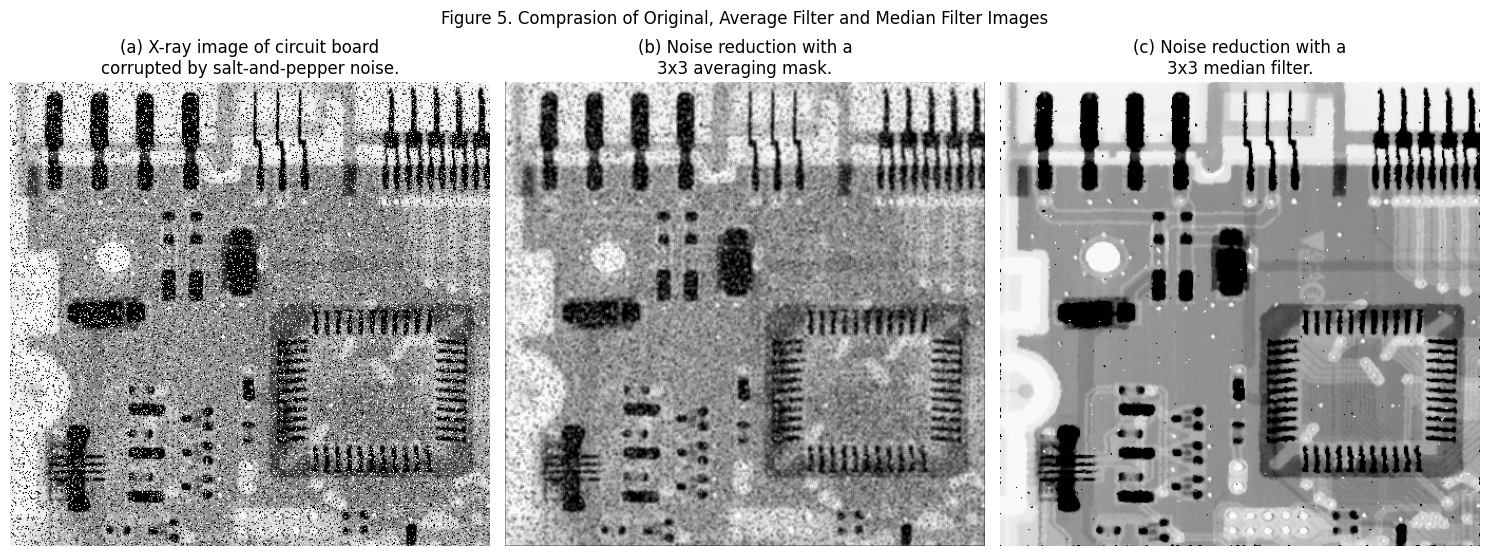

In [52]:
f_correlation = myImageCorrelation(kernel_3x3, data)
f_median = myImageMedian(3, data)

fig, ax = plt.subplots(1, 3, figsize=(15, 6))
ax[0].axis("off"), ax[1].axis("off"), ax[2].axis("off")
ax[0].imshow(data, cmap="gray"), ax[1].imshow(f_correlation, cmap="gray"), ax[2].imshow(f_median, cmap="gray")
ax[0].set_title('(a) X-ray image of circuit board\ncorrupted by salt-and-pepper noise.')
ax[1].set_title("(b) Noise reduction with a\n3x3 averaging mask.")
ax[2].set_title('(c) Noise reduction with a\n3x3 median filter.')
fig.suptitle("Figure 5. Comprasion of Original, Average Filter and Median Filter Images")
fig.tight_layout()
plt.show()

Yukarıdaki Figure 5 incelendiğinde, Figure 5(c)'deki 3x3 median filtrenin her bir pikselin değerini komşu piksellerin medyan değeri ile değiştirerek tuz ve biber gürültüsünü etkili bir şekilde azaltığı yazılan algoritma ve oluşturulan görsel ile anlaşılmıştır. Bu yöntemin, pixellerdeki aşırı değerlerin etkisini ortadan kaldırarak görüntüdeki keskin kenarları ve detayları koruduğu görülmüştür. Buna karşılık, Figure 5(b)'de 3x3 smoothing with square averaging filtre, her bir pikselin değerini komşu piksellerin ortalaması ile değiştirmiş ve bu da gürültüyü azaltırken görüntüyü bulanıklaştırmıştır. Bu nedenle median filtre, özellikle tuz ve biber gürültüsüne sahip görüntülerde daha net ve anlaşılır sonuçlar verdiği belirlenmiştir.